# 그래프 이론 기초

그래프(graph)는 다음 그림처럼 노드(node, vertex)와 그 사이를 잇는 간선(edge)으로 이루어진 구조를 말한다. 

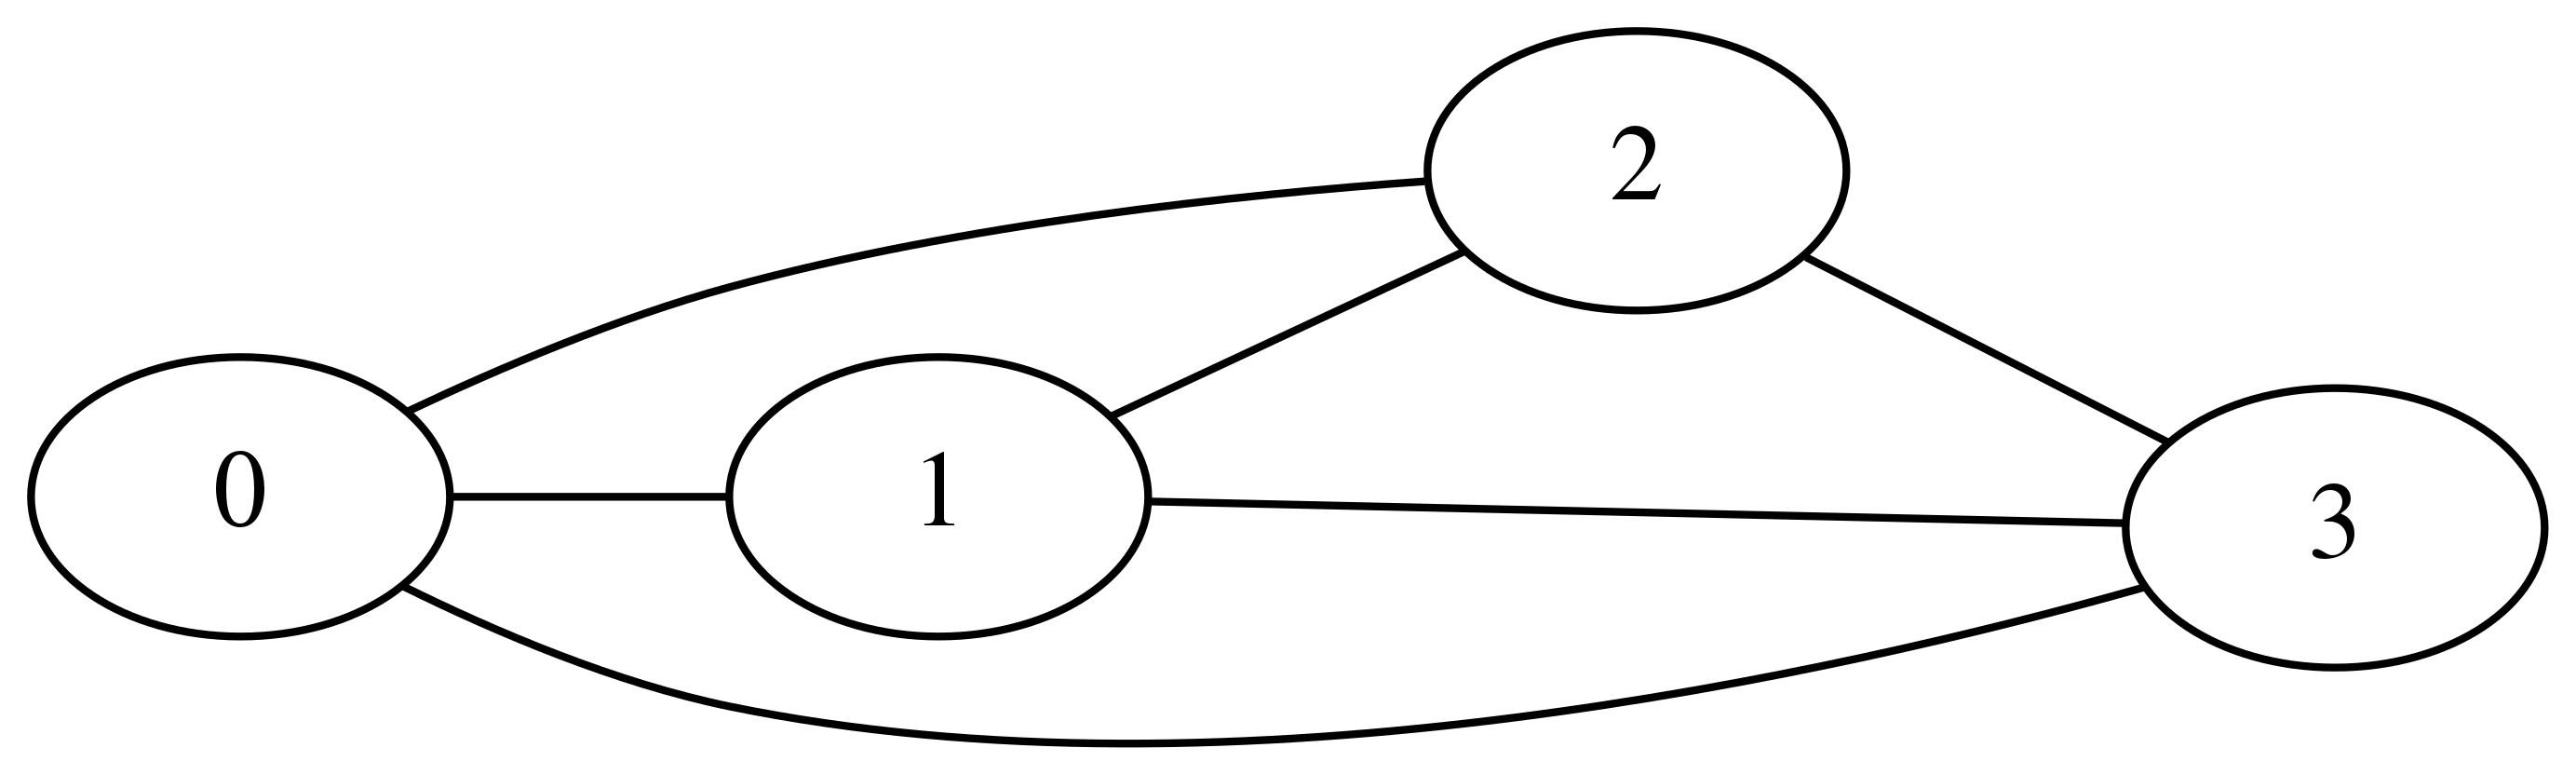

In [1]:
import networkx as nx
from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

g = nx.complete_graph(4)
d = to_pydot(g)
d.set_dpi(600)
d.set_rankdir("LR")
Image(d.create_png(), width=600)

수학적으로 그래프 $G$는 노드(vertex) 집합 $V$와 간선(edge) 집합 $E$로 구성된다. 

$$ G = (V, E) $$

간선은 두 개의 노드으로 이루어진 순서가 있는 쌍(ordered pair)이다.

$$ E \subseteq V \times V $$

위에서 그린 그래프는 4개의 노드 집합

$$ V = \{ 0, 1, 2, 3 \} $$

과 6개의 간선 집합

$$ E = \{ (0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3) \} $$

를 가진다.

## 방향성 그래프와 비방향성 그래프

만약 간선 $(a,b)$와 $(b,a)$이 있을 때 이 두 간선을 다른 것으로 본다면 간선의 방향이 있는 방향성 그래프(directed graph)이고 두 간선을 같은 것으로 본다면 간선의 방향이 없는 비방향성 그래프(undirected graph)이다. 그래프를 시각화를 할 때 방향성은 화살표로 표시한다.

## NetworkX 패키지

NetworkX는 그래프를 다루기 위한 파이썬 패키지이다. 그래프를 만드는 클래스 `Graph`, `DiGraph`를 제공한다. `Graph` 클래스는 비방향성 그래프, `DiGraph` 클래스는 방향성 그래프를 나타낸다.

NetworkX 패키지는 원래 버전 2 이상이 나와 있지만 여기에서는 나중에 사용할 pgmpy 패키지와의 호환성을 위해 버전 1.11을 사용하도록 한다.

In [2]:
import networkx
networkx.__version__

'1.11'

In [3]:
import networkx as nx
g1 = nx.DiGraph()

노드를 추가할 때는 `add_node` 메서드를 사용한다. 노드의 이름으로는 숫자나 문자열을 사용할 수 있다. 그래프에 포함된 노드는 `nodes` 메서드(버전 2에서는 속성)으로 확인할 수 있다.

In [4]:
g1.add_node("a")
g1.add_node(1)
g1.add_node(2)
g1.nodes()

['a', 1, 2]

간선을 추가할 때는 `add_edge` 메서드(버전 2에서는 속성)를 사용한다. 간선을 이을 두 노드을 인수로 입력한다. 그래프에 포함된 노드는 `nodes` 속성으로 확인할 수 있다.

In [5]:
g1.add_edge(1, "a")
g1.add_edge(1, 2)
g1.edges()

[(1, 'a'), (1, 2)]

만약 graphviz 프로그램과 pydot 패키지가 설치되어 있다면 이를 이용하여 시각화할 수도 있다.

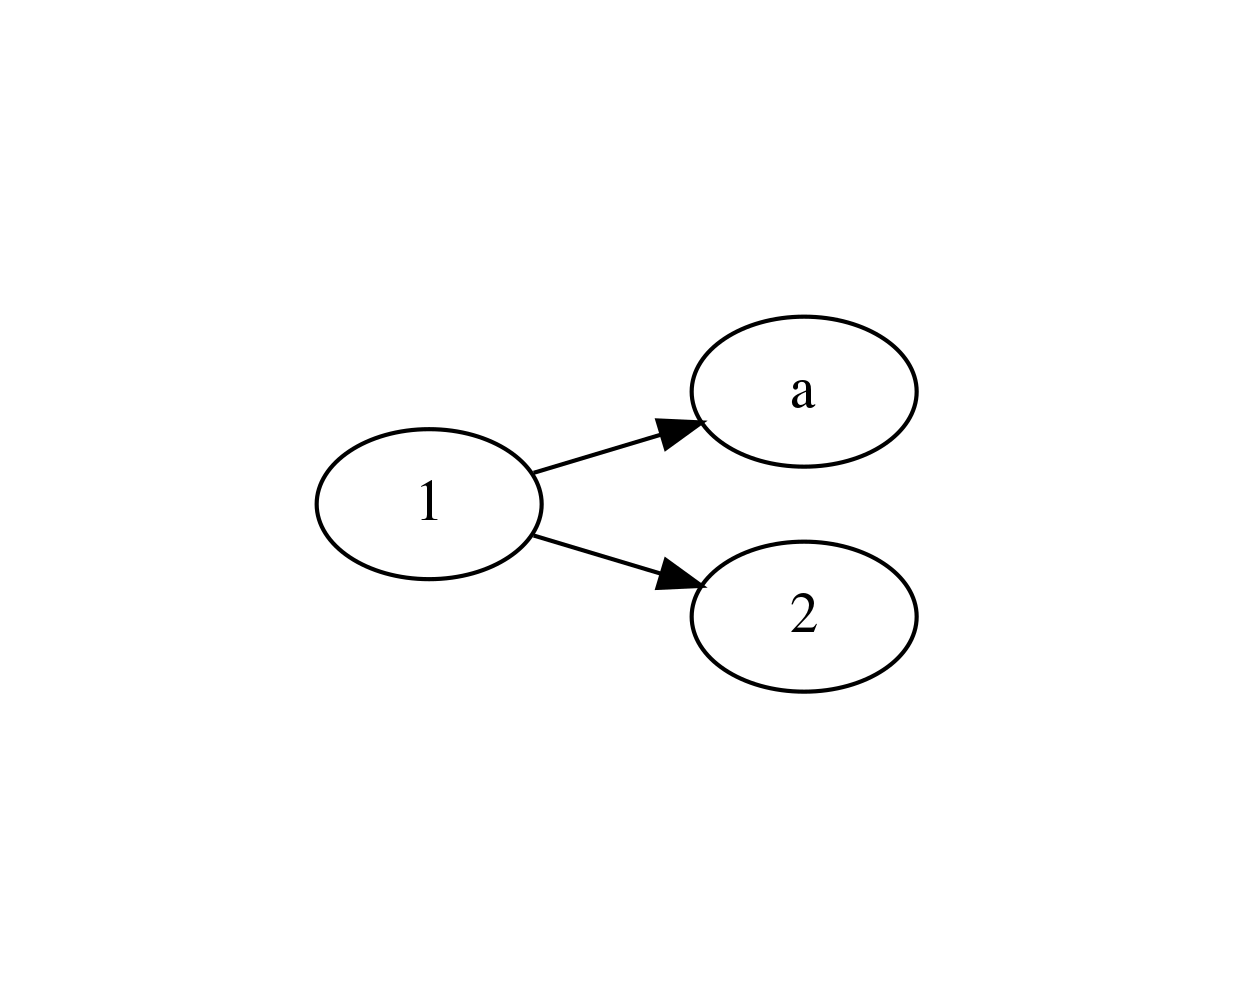

In [6]:
from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

d1 = to_pydot(g1)
d1.set_dpi(300)
d1.set_rankdir("LR")
d1.set_margin(1)
Image(d1.create_png(), width=300)

노드 집합 $V$와 간선 집합 $V$를 가지는 그래프 $G$에 포함된 노드의 갯수를 그래프의 크기(cardinality)라고 하며 $|G|$ 또는 $|V|$로 나타내고 간선의 갯수는 $|E|$로 나타낸다.

NetworkX 패키지에서는 각각 `len` 명령, `number_of_nodes`, `number_of_edges` 메서드로 계산할 수 있다.

In [7]:
len(g1), g1.number_of_nodes(), g1.number_of_edges()

(3, 3, 2)

만약 두 노드 $a$, $b$를 포함하는 간선 $(a,b)$가 $E$ 안에 존재하면 두 노드는 인접하다(adjacent)고 하며 인접한 두 노드는 서로 이웃(neighbor)이라고 한다.

$$ (a,b) \in E $$

NetworkX 패키지 `Graph` 클래스의 `neighbors` 메서드는 인수로 받은 노드에 인접한 노드를 생성하므로 인접성을 확인하는데 사용할 수 있다.

In [8]:
for n in g1.neighbors(1):
    print(n)

a
2


In [9]:
2 in g1.neighbors(1), 1 in g1.neighbors(2), "a" in g1.neighbors(2), "a" in g1.neighbors(1)

(True, False, False, True)

만약 어떤 노드에서 출발하여 자기 자신으로 바로 돌아오는 간선이 있다면 셀프 루프(self loop)라고 한다. 다음 그래프에서는 노드 2에 셀프 루프가 있다.

In [10]:
g2 = nx.Graph()
g2.add_node(1)
g2.add_node(2)
g2.add_node(3)
g2.add_edge(1, 2)
g2.add_edge(2, 2)
g2.add_edge(2, 3)
np.random.seed(0)

셀프 루프가 있는 경우에는 graphviz로만 시각화할 수 있다.

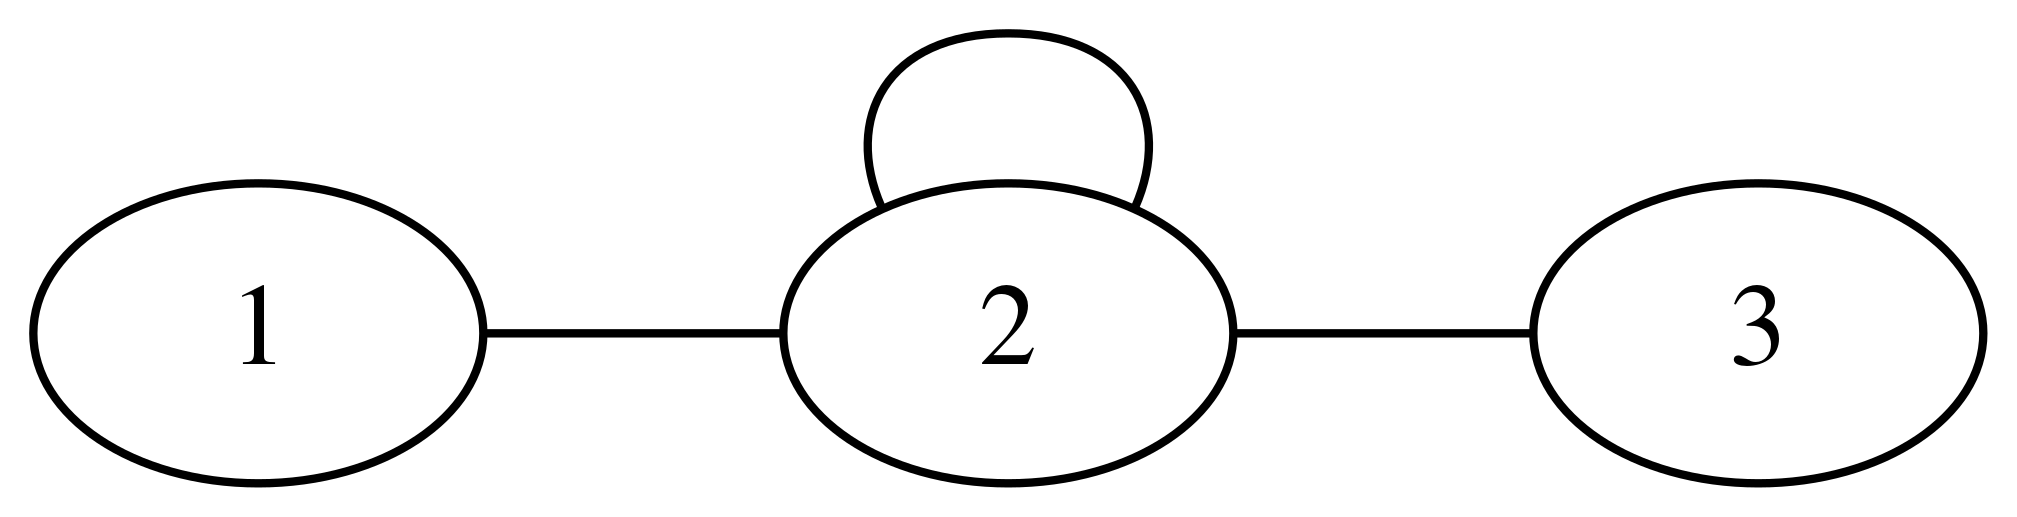

In [11]:
d2 = to_pydot(g2)
d2.set_dpi(600)
d2.set_rankdir("LR")
Image(d2.create_png(), width=600)

## 워크, 패스, 사이클, 트레일

어떤 노드를 출발해서 다른 노드로 도달하기 위한 인접한 노드의 순서열 워크(walk)라고 한다. 워크 중에서 시작과 끝을 제외한 다른 노드에 대해서 동일한 노드를 두 번 이상 지나지 않는 워크를 패스(path)라고 한다. 패스 중에서 시작점과 끝점이 동일한 패스를 사이클(cycle)이라고 한다. 사이클이 없는 그래프를 어사이클릭 그래프(acyclic graph)라고 한다. 어떠한 노드든 동일한 노드를 두 번 이상 지나지 않는 워크는 트레일(trail)이라고 한다.  

다음 그래프 $g3$에서 워크, 트레일, 패스, 사이클을 찾아보자.

* $a-c-d-c-e$는 $a$에서 $c$로 가는 워크이다. 하지만 트레일이나 패스는 아니다. 
* $a-b-c-d-e$는 트레일이다. 
* $a-b-c-d-e-c$는 패스지만 트레일은 아니다. 
* $a-b-c-a$는 사이클이다.


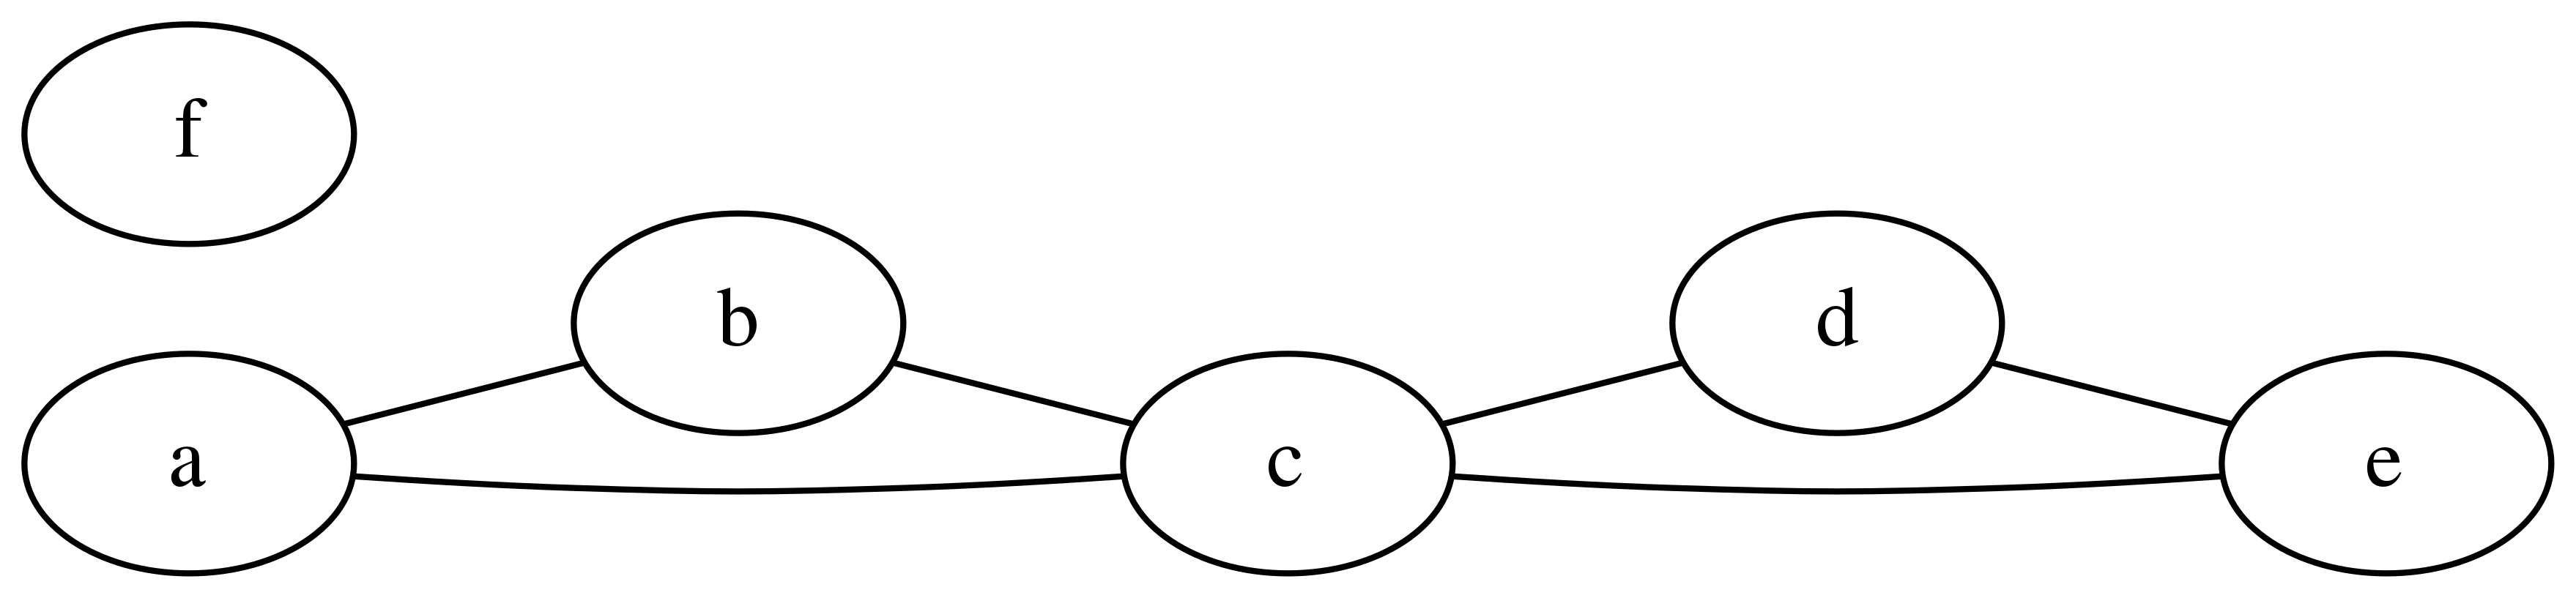

In [12]:
g3 = nx.Graph()
g3.add_node("a")
g3.add_node("b")
g3.add_node("c")
g3.add_node("d")
g3.add_node("e")
g3.add_node("f")
g3.add_edge("a", "b")
g3.add_edge("a", "c")
g3.add_edge("b", "c")
g3.add_edge("c", "d")
g3.add_edge("d", "e")
g3.add_edge("c", "e")

d3 = to_pydot(g3)
d3.set_dpi(600)
d3.set_rankdir("LR")
Image(d3.create_png(), width=800)

`has_path` 명령으로 두 노드간에 패스가 존재하는지 알 수 있다. 패스가 존재하면 `shortest_path` 명령으로 가장 짧은 패스를 구할 수 있다.

In [13]:
nx.has_path(g3, "a", "b"), nx.has_path(g3, "a", "e"), nx.has_path(g3, "a", "f")

(True, True, False)

In [14]:
nx.shortest_path(g3, "a", "e")

['a', 'c', 'e']

## 클리크

무방향성 그래프의 노드 집합 중에서 모든 노드끼리 간선이 존재하면 그 노드 집합을 클리크(clique)라고 한다. 만약 클리크에 포함된 노드에 인접한 다른 노드를 추가하면 클리크가 아니게 되는 것을 최대클리크(maximal clique)라고 한다. 
다음 그래프 $g3$에서 클리크를 찾아보자.

* $\{a, b\}$는 클리크이다. 하지만 최대클리크는 아니다.
* $\{a, b, c\}$는 클리크이며 최대클리크이다.


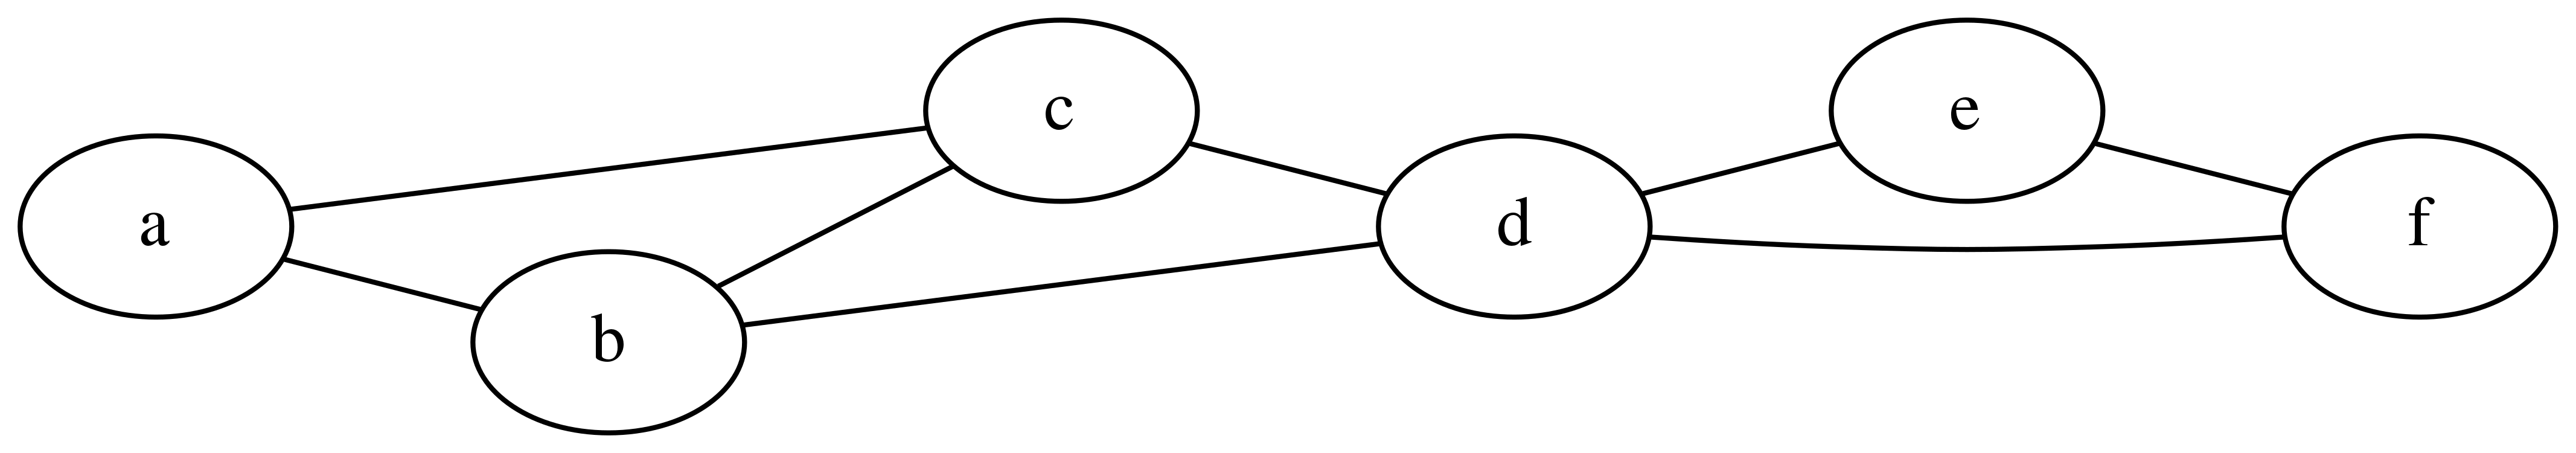

In [15]:
g4 = nx.Graph()
g4.add_node("a")
g4.add_node("b")
g4.add_node("c")
g4.add_node("d")
g4.add_node("e")
g4.add_node("f")
g4.add_edge("a", "b")
g4.add_edge("a", "c")
g4.add_edge("b", "c")
g4.add_edge("b", "d")
g4.add_edge("c", "d")
g4.add_edge("d", "e")
g4.add_edge("d", "f")
g4.add_edge("e", "f")

d4 = to_pydot(g4)
d4.set_dpi(600)
d4.set_rankdir("LR")
Image(d4.create_png(), width=800)

`cliques_containing_node` 명령은 특정 노드를 포함하는 클리크를 찾는다.

In [16]:
nx.cliques_containing_node(g4, ["a"])

{'a': [['a', 'c', 'b']]}

In [17]:
nx.cliques_containing_node(g4, ["a", "b"])

{'a': [['a', 'c', 'b']], 'b': [['d', 'c', 'b'], ['a', 'c', 'b']]}

`enumerate_all_cliques` 명령은 모든 클리크를, `find_cliques`는 모든 최대클리크를 찾는다.

In [18]:
[c for c in nx.enumerate_all_cliques(g4)]

[['a'],
 ['b'],
 ['c'],
 ['d'],
 ['e'],
 ['f'],
 ['a', 'b'],
 ['a', 'c'],
 ['b', 'c'],
 ['b', 'd'],
 ['c', 'd'],
 ['d', 'e'],
 ['d', 'f'],
 ['e', 'f'],
 ['a', 'b', 'c'],
 ['b', 'c', 'd'],
 ['d', 'e', 'f']]

In [19]:
[c for c in nx.find_cliques(g4)]

[['d', 'f', 'e'], ['d', 'c', 'b'], ['a', 'c', 'b']]